In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Step 1: Load the data
# Assuming the CSV file is named 'traffic_data.csv'
data = pd.read_csv('Data.csv', dtype={'Column_Name': str}, low_memory=False)
data = data.dropna(axis=1, how='all')
data = data.dropna()

data['Count Start Date'] = pd.to_datetime(data['Count Start Date'], dayfirst=True, errors='coerce')

start_date_filter = '2018-02-09'
filtered_data = data[data['Count Start Date'] >= start_date_filter]

# # Step 2: Select and normalize traffic volume features
# features = [
#     '5 Day ADT', '7 Day ADT', 'Saturday Volume', 'Sunday Volume', 
#     'AM Peak Volume', 'Mid Peak Volume', 'PM Peak Volume', 
#     'Car', 'LCV', 'MCV', 'HCV-I', 'HCV-II', 'HCV Total'
# ]

features = [
    '5 Day ADT', '7 Day ADT', 'Saturday Volume', 'Sunday Volume', 
    'AM Peak Volume', 'Mid Peak Volume', 'PM Peak Volume'
]

# # Check if all features are present in the dataset
missing_features = [feature for feature in features if feature not in data.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    # Extract the features for normalization
    traffic_data = filtered_data[features]
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Fit and transform the data
    normalized_data = scaler.fit_transform(traffic_data)
    
    # Convert the normalized data back to a DataFrame
    normalized_df = pd.DataFrame(normalized_data, columns=features)
    
    # Display the first few rows of the normalized data
    print(filtered_data.head())
    print(normalized_df.head())


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by StandardScaler.

In [35]:
from sklearn.cluster import KMeans
# Example number of clusters (you should choose based on your data and objectives)

num_clusters = 5

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering on the normalized data
kmeans.fit(normalized_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels back to the normalized_df
normalized_df['Cluster'] = cluster_labels

# Optionally, inspect cluster centers
cluster_centers = kmeans.cluster_centers_

# Print cluster centers (if needed)
print("Cluster Centers:\n", cluster_centers)

# Print first few rows of normalized_df with cluster labels
print("\nData with Cluster Labels:\n", normalized_df.head())

Cluster Centers:
 [[ 0.08013625  0.08020835  0.07538297  0.08258042  0.14594251  0.10482119
   0.13846602]
 [-0.63632121 -0.63616998 -0.6230593  -0.61911828 -0.64809596 -0.64015994
  -0.65941138]
 [ 4.03584545  4.07102072  4.13788936  4.03244793  3.73391156  3.96678965
   3.76518312]
 [ 2.1372837   2.13931409  2.10734781  2.08509411  2.01834928  2.11243786
   2.07727884]
 [ 1.02684144  1.02107906  0.98167761  0.97721328  1.06616785  1.02484926
   1.0928363 ]]

Data with Cluster Labels:
    5 Day ADT  7 Day ADT  Saturday Volume  Sunday Volume  AM Peak Volume  \
0   1.979051   1.884844         1.601815       1.470953        2.144340   
1   0.020558   0.066915         0.299802       0.106274       -0.091664   
2   0.152796   0.169761         0.292843       0.129910        0.236997   
3   0.859098   0.958884         1.416539       1.054688        0.724450   
4   0.816430   0.710660         0.444638       0.254973        0.779842   

   Mid Peak Volume  PM Peak Volume  Cluster  
0         1

ValueError: x and y must be the same size

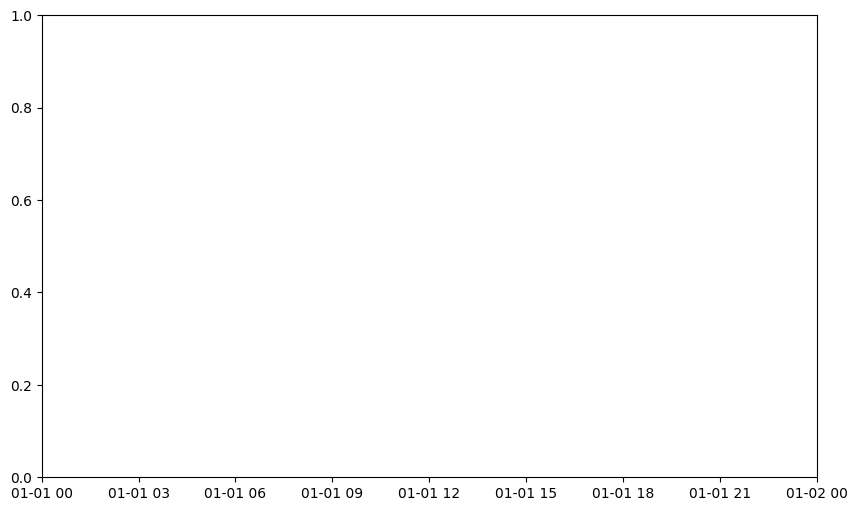

In [36]:
import matplotlib.pyplot as plt

# Scatter plot of the data points colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Count Start Date'], normalized_df['PM Peak Volume'], c=normalized_df['Cluster'], cmap='viridis', s=50, alpha=0.5)
plt.colorbar(label='Cluster')
plt.title('K-means Clustering')
plt.xlabel('Count Start Date')
plt.ylabel('PM Peak Volume')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=200, label='Cluster Centers')

plt.legend()
plt.show()
